<a href="https://colab.research.google.com/github/machave11/Supervised-Algorithms-practice/blob/main/Supervised_Algorithms_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learnings Algorithms

# K-Nearst Neighbours 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
# lets create numpy array for features and array
X = df.drop('Outcome', axis=1).values
y= df['Outcome'].values

In [9]:
# import train test split
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=42, stratify=y)

In [11]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# Set up array to tarin and test accuracy 
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  # set up knn clasifier with k neighbors
  knn = KNeighborsClassifier(n_neighbors=k)
  # fit the model
  knn.fit(X_train, y_train)

  # Compute accuracy on training set
  train_accuracy[i] = knn.score(X_train, y_train)
  # compute accuracy on testing set
  test_accuracy[i]= knn.score(X_test,y_test)

<function matplotlib.pyplot.show>

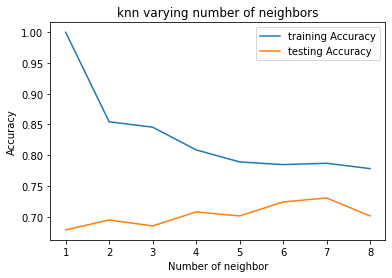

In [13]:
plt.title('knn varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='training Accuracy')
plt.plot(neighbors, test_accuracy, label='testing Accuracy')
plt.xlabel('Number of neighbor')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [14]:
# setup knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [16]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
knn.score(X_test, y_test)

0.7305194805194806

In [19]:
# import confusion metrixs
from sklearn.metrics import confusion_matrix, roc_curve

In [20]:
# lest us predicting using the classifier we had a fit above
y_pred =knn.predict(X_test)

In [21]:
confusion_matrix(y_test, y_pred)

array([[165,  36],
       [ 47,  60]])

In [23]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [24]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

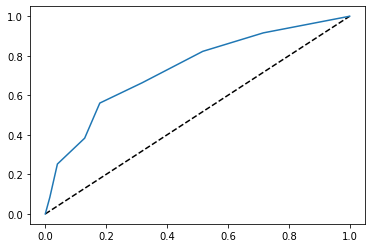

In [28]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')

In [30]:
# Area under curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.7345050448691124

In [32]:
# Import GridsearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors":np.arange(1,50)}

In [36]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})